# Tutorial 2

Here we will make another linear lattice and send a swarm of particles through it. We will also consider how to examine slices through the lattice in phase space, also known as Poincare maps

In [1]:
from particle_tracer_lattice import ParticleTracerLattice
L_drift=.2
L_lens=.1
Bp=1.0
rp=.01
lattice=ParticleTracerLattice(initial_ang=0.0) #make the lattice and point it along +x
#add some elements
lattice.add_drift(L_drift)
lattice.add_lens_ideal(L_lens,Bp,rp)
lattice.add_drift(L_drift)
lattice.end_lattice() #finish the lattice so the geometry can be solved

Make a Swarm and a SwarmTracer, and trace the swarm

In [8]:
from swarm_tracer import SwarmTracer
h=1e-5 #time step size, s.
T=1.0 #max simulation time
st=SwarmTracer(lattice)
swarm_initial=st.pseudorandom_swarm(q_trans_bounds=1e-3,p_trans_bounds=10.0,num_particles=100) #make a random swarm in phase space
swarm_traced=st.trace_swarm_through_lattice(swarm_initial,h,T,use_fast_mode=False)

Plot the swarm in the lattice

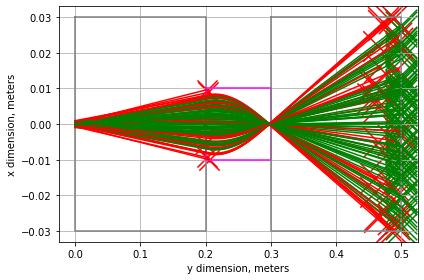

In [9]:
lattice.show(swarm=swarm_traced,true_aspect_ratio=False)

Now let's make a poincare map inside the lens. You can do alot of analysis with this

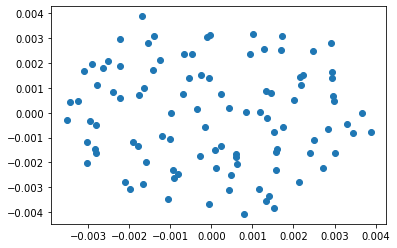

In [4]:
from analysis.phaseSpaceAnalyzer import SwarmPoincare
import matplotlib.pyplot as plt
x_lens_middle=L_drift+L_lens/2
swarm_slice=SwarmPoincare(swarm_traced,x_lens_middle)

#simple scatter plot of locations inside the lens
x_plot,y_plot=[],[]
for particle in swarm_slice:
    x_plot.append(particle.q[1])
    y_plot.append(particle.q[2])
plt.scatter(x_plot,y_plot)
plt.show()